# Model Evaluation

In [51]:
# Import the Titanic data
import pandas as pd
import numpy
titanic_raw = pd.read_csv('../../data/titanic.csv', index_col='PassengerId')
titanic = titanic_raw[titanic_raw.Age.notnull()].copy()
titanic['ScaledAge'] = titanic.Age/20
titanic['Gender'] = numpy.where(titanic.Sex == 'male', 1, 0)

#feature_cols = ['Pclass', 'Parch', 'Age']
feature_cols = ['Pclass', 'Parch', 'ScaledAge', 'Gender']
#X = titanic[titanic.Age.notnull()][feature_cols]
X = titanic[feature_cols]
y = titanic.Survived


In [52]:
# import the sklearn.cross_validation library
import sklearn.cross_validation
from sklearn.cross_validation import train_test_split
import sklearn.model_selection

In [53]:
# Split the data into training and testing sets using train_test_split
(trainX, testX, trainY, testY) = train_test_split(X, y)
#sklearn.cross_validation.


In [54]:
# Train your favourite predictor on the training data
#import sklearn.linear_model
#logreg = sklearn.linear_model.LogisticRegression(C=100000)
#logreg.fit(trainX, trainY)

import sklearn.neighbors
#knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(trainX, trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [55]:
# Use this model to predict the test data 
predictions = knn.predict(testX)
predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [56]:
# How accurate was your model on this test data? 
predictions == testY


PassengerId
438     True
38      True
481     True
330     True
717     True
764     True
781     True
5       True
497     True
277     True
219     True
580    False
814     True
115    False
269     True
73      True
208    False
7      False
235     True
293     True
805    False
396     True
623    False
316    False
507     True
398     True
604     True
607     True
819     True
566     True
       ...  
867     True
439     True
447     True
40      True
763    False
806     True
195     True
787    False
211     True
329    False
749    False
334     True
132     True
372     True
150     True
139     True
731     True
666     True
44      True
780     True
371     True
699     True
425     True
238     True
573     True
319     True
344     True
820     True
635     True
87      True
Name: Survived, dtype: bool

In [57]:
(predictions == testY).value_counts()

True     139
False     40
Name: Survived, dtype: int64

In [58]:
import sklearn.metrics
sklearn.metrics.accuracy_score(testY, predictions)

0.77653631284916202

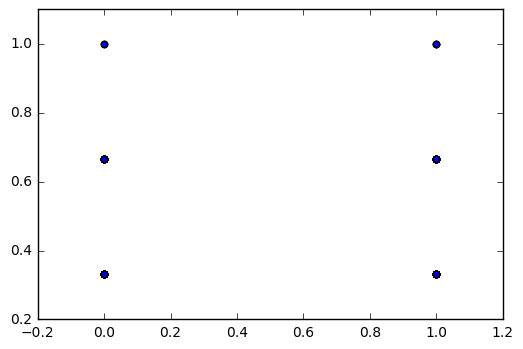

In [21]:
%matplotlib inline
import matplotlib.pyplot
matplotlib.pyplot.scatter(testY, predictions)


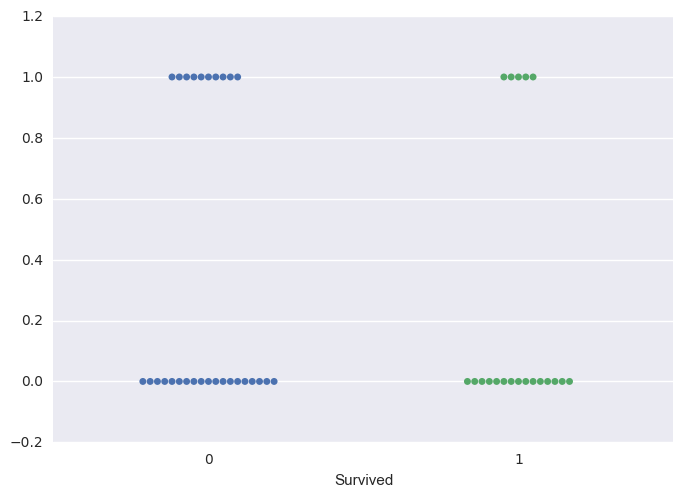

In [25]:
import seaborn
seaborn.swarmplot(testY, predictions)

### Null accuracy

Null accuracy is the accuracy that could be achieved by always predicting the **most frequent class**. It is a baseline against which you may want to measure your classifier.

In [27]:
# import the sklearn.dummy library
import sklearn.dummy

In [40]:
# How accurate is the DummyClassifier on your data?
# (Hopefully it was better than your favourite predictor)
dummy = sklearn.dummy.DummyClassifier(strategy='most_frequent')
dummy.fit(trainX, trainY)
dumb_predictions = dummy.predict(testX)
sklearn.metrics.accuracy_score(testY, dumb_predictions)

0.55865921787709494

## K-fold

In [ ]:
# Use sklearn.cross_validation.cross_val_score to test your classifier
# 10 times on different partitions

In [74]:
sklearn.cross_validation.cross_val_score(
    sklearn.neighbors.KNeighborsClassifier(n_neighbors=10),
    X,
    y,
    cv=3,
    scoring='accuracy'
).mean()

0.79975853484235715

In [75]:
import sklearn.grid_search

/Users/gregb/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [77]:
param_grid = {
    'n_neighbors': [1, 3, 5, 10, 50]
}
BruteForce = sklearn.grid_search.GridSearchCV(
    sklearn.neighbors.KNeighborsClassifier(),
    param_grid = param_grid,
    scoring = 'accuracy',
    cv=25
)
BruteForce.fit(X, y)

GridSearchCV(cv=25, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [79]:
BruteForce.best_params_

{'n_neighbors': 5}

In [81]:
BruteForce.best_score_

0.8067226890756303

In [82]:
BestWonderfulClassifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

In [83]:
BestWonderfulClassifier

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')